# Задание 1

## Библиотеки

In [17]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import os.path

## Работа с первым фото

Загрузка первого фото

Shape: (1280, 960, 3)


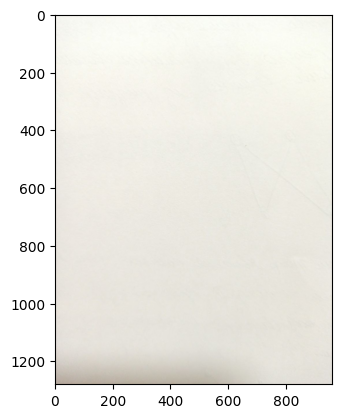

In [18]:
img = plt.imread('foto/EV0_2.jpg')
print("Shape:", img.shape)
plt.imshow(img)
plt.show()

По каждому индексу - массив для трех каналов

In [19]:
img[100][100]

array([250, 251, 243], dtype=uint8)

Для работы будет взят левый верхний квадрат 100х100

Shape: (100, 100, 3)


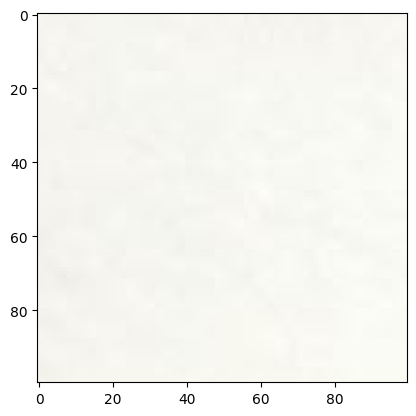

In [20]:
img_cut = img[0:100, 0:100]
print("Shape:", img_cut.shape)
plt.imshow(img_cut)

Сворачивание трехмерного канального массива в одно число для одного пикселя

In [21]:
px_arr = img_cut[0,0]
print("Before", px_arr)

px = int(px_arr.mean())
print("After", px)

Before [247 246 241]
After 244


Так для каждого пикселя в этом квадрате

In [22]:
gray_img = np.zeros((len(img_cut), len(img_cut)))
for i in range(len(img_cut)):
    for j in range(len(img_cut)):
        px_arr = img_cut[i,j]
        px = int(px_arr.mean())
        gray_img[i,j] = px

print(gray_img)

[[244. 243. 242. ... 243. 244. 244.]
 [244. 243. 242. ... 244. 244. 244.]
 [243. 243. 242. ... 245. 245. 245.]
 ...
 [239. 239. 239. ... 248. 248. 248.]
 [240. 240. 240. ... 248. 248. 248.]
 [241. 241. 241. ... 248. 248. 248.]]


Полученное изображение

Shape: (100, 100)


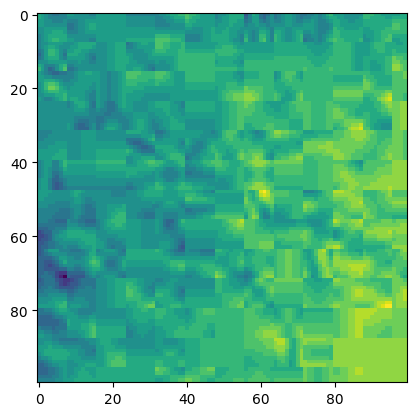

In [23]:
print("Shape:", gray_img.shape)
plt.imshow(gray_img)

Cреднее по данному квадрату

In [24]:
mean_gray = gray_img.sum() / (len(gray_img) * len(gray_img))
print(mean_gray)

244.058


Логариф от среднего

In [25]:
log_gray = np.log(mean_gray)
print(log_gray)

5.497405901963897


## Функция, которая будет применяться к каждому изображению

In [26]:
def get_num_from_img(img_name):
    img = plt.imread(img_name)

    img_cut = img[0:100, 0:100]

    gray_img = np.zeros((len(img_cut), len(img_cut)))
    for i in range(len(img_cut)):
        for j in range(len(img_cut)):
            px_arr = img_cut[i,j]
            px = int(px_arr.mean())
            gray_img[i,j] = px

    mean_gray = gray_img.sum() / (len(gray_img) * len(gray_img))
    log_gray = np.log(mean_gray)
    return log_gray

Проверка, что получилось то же число

In [27]:
test = get_num_from_img('foto/EV0_2.jpg')
print("Результат функции", test)
print(test == log_gray)

Результат функции 5.497405901963897
True


## Применение функции к изображениям

Получение путей до изображений

In [28]:
def get_images_in_dir(path_to_cur_dir):
    # хранит абсолютные пути до изображений в данной папке
    paths_to_files = []

    # обходит заданный калатог
    for address, _, files in os.walk(path_to_cur_dir):
        for name in files:
            paths_to_files.append(os.path.join(address, name))
    return paths_to_files

Проверка: изображений должно быть 13

In [29]:
images = get_images_in_dir("foto/")
print("Количество изображений:", len(images))
print(images)

Количество изображений: 13
['foto/EV0_2.jpg', 'foto/EV1_1-5.jpg', 'foto/EV2_1.jpg', 'foto/EV3_0-5.jpg', 'foto/EV4_0.jpg', 'foto/EV5_m0-5.jpg', 'foto/EV6_m1.jpg', 'foto/EV7_m1-5.jpg', 'foto/EV8_m2.jpg', 'foto/EV90_m2-5.jpg', 'foto/EV91_m3.jpg', 'foto/EV92_m3-5.jpg', 'foto/EV93_m4.jpg']


Получение числа для каждого изображения

In [30]:
log_brightness = []
for cur_img in images:
    cur_num = get_num_from_img(cur_img)
    log_brightness.append(cur_num)
print(len(log_brightness))
print(log_brightness)

13
[5.497405901963897, 5.415654525038191, 5.33321239123261, 5.246926172631642, 5.188341215213622, 5.080031373172989, 4.8176603913919465, 4.551352655764633, 4.266029191398154, 3.980843595408824, 3.7062551191103528, 3.397818345811995, 3.0712849159546627]


## Построение графика

Массив с соответствующими EV для изображений

In [31]:
ev_values = [2.0, 1.5, 1.0, 0.5, 0.0, -0.5, -1.0, -1.5, -2.0, -2.5, -3.0, -3.5, -4.0]
print(len(ev_values))

13


Построение графика

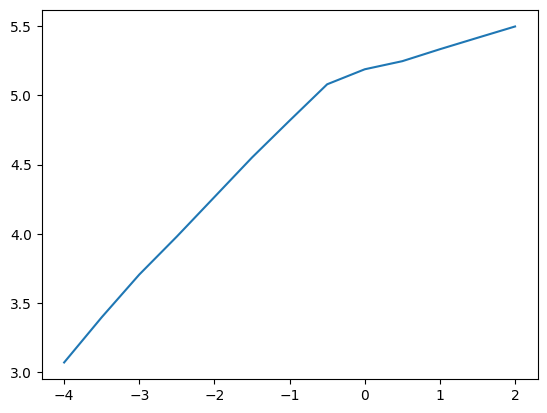

In [32]:
plt.plot(ev_values, log_brightness)
plt.show()